# Цифровая обработка сигналов - 4

| **Title**         | Digital signal processing |
| --- | --- |
| **Author**        | Alexander Kapitanov       |
| **Contact**       | sallador@bk.ru            |
| **Project lang**  | Python                    |
| **Packages**      | numpy, scipy, matplotlib  |
| **License**       | GNU GPL 3.0               |


## Введение

Перед вами обучающий материал по основам **цифровой обработки сигналов** с использованием средств языка программирования Python. Предполагается, что читатель имеет базовые знания из области высшей математики, а также владеет языком Python и хотя бы поверхностно знает различные python-библиотеки - numpy/scipy, matplotlib и другие. 

Для пользователей MATLAB / GNU Octave освоение материала с точки зрения программного кода не составит труда, поскольку основные функции и их атрибуты во многом идентичны и схожи с методами из python-библиотек.

## Сигналы

В предыдущих частях мы узнали, что *сигнал* - это физический процесс, параметры которого изменяются в соответствии с передаваемым сообщением. Сигналы бывают – *случайные* и *детерминированные*. 

**Случайным** сигналом называют функцию времени, значения которой заранее неизвестны и могут быть предсказаны лишь с некоторой *вероятностью*. К основным характеристикам случайных сигналов относятся:

* закон распределения (относительное время пребывания значения сигнала в определенном интервале),
* спектральное распределение мощности.

**Детерминированные** сигналы описываются аналитической функцией (задаются аналитически), и их поведение полностью известно в любой момент времени.

Случайные сигналы делятся на два класса: 1) шумы - беспорядочные колебания, состоящие из набора разных частот и амплитуд, 2) сигналы, несущие информацию, для обработки которых требуется прибегать к вероятностным методам. 

Случайные сигналы характеризуются **плотностью распределения вероятностей**. Плотность верноятности это один из способов задания распределения случайных величин.  Плотность вероятности - неотрицательная функция при любых значениях дискретного сигнала. Для аналоговых случайных сигналов интеграл от функции сигнала во всем диапазоне значений стремится к единице. Для дискретных случайных величин **не** существует функции плотности распределения вероятностей, т.к. дискретная случайная величина не является непрерывной функцией. Однако, математический аппарат позволяет вычислять приближенные значения функции.

Простые примеры дискретных случайных величин:
- количество выпавших орлов и количество выпавших решек при броске монеты счетное число N раз,
- число попаданий в мишень при ограниченном числе выстрелов.
- погрешности измерений приборов

## Случайные сигналы

Плотность вероятности случайного сигнала позволяет определить математические моменты разного порядка:

- **Математическое ожидание**: среднее значение последовательности случайных величин

$m = \frac{1}{N}\sum_{n=0}^{N-1}x(n)$

Под математическим ожиданием в теории сигналов зачастую понимают смещение сигнала по уровню относительно нуля (постоянная составляющая). 

В python для вычисления математического ожидания используется метод `mean()`

- **Дисперсия**: среднее значение квадратов разностей между значениями последовательности и её средним значением

$\sigma^2 = \frac{1}{N-1}\sum_{n=0}^{N-1}|x(n) - m|^{2}$ 

В литературе часто используется термин **среднеквадратическое отклонение**. Эта величина равна квадратному корню из дисперсии сигнала.

В python для вычисления дисперсии используется метод - `var()`, а для поиска среднеквадратического отклонения используется метод - `std()`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, rfft

%matplotlib inline

Случайный дискретный сигнал при $N = 100000$ отсчётов и его плотность вероятности:

Mean of the signal: -0.032692104037689004
Std. of the signal: 10.020365002664889


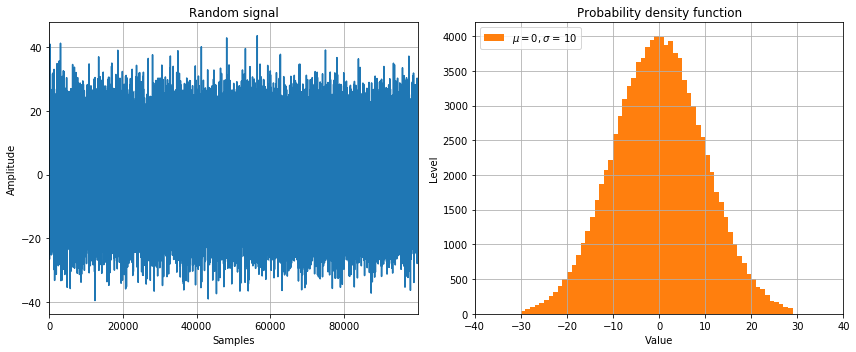

In [2]:
N = 100000

# Random signal
m, s = 0, 10
np.random.seed(2)
sig = np.random.normal(m, s, N)

# Create hist for PDF
hist, _ = np.histogram(sig, bins=list(range(0, 256)))

# Plot figure
fig = plt.figure(1, figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Random signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.plot(sig, color='C0')
plt.xlim([0, N-1])
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Probability density function')
plt.xlabel('Value')
plt.ylabel('Level')
plt.xlim([-4*s, 4*s])
plt.hist(sig, bins=list(range(-s*3, s*3)), color='C1', label=r'$\mu = %d, \sigma$ = %d' % (m, s))
plt.grid()
plt.legend(loc='upper left')
plt.tight_layout()

print('Mean of the signal:', np.mean(sig))
print('Std. of the signal:', np.std(sig))

### Нормальное распределение

Согласно **центральной предельной теореме**, сумма большого числа слабо зависимых случайных величин имеет распределение близкое к **нормальному**. При этом, случайные величины распределены в рамках определенного масштаба, то есть ни одно из значений не вносит существенного вклада в конечную сумму.

Нормальное распределение (распределение Гаусса) - распределение вероятностей, которое задаётся функцией:

$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{- \frac{(x-\mu)^2}{2\sigma^2}}$

где $\mu$ - математическое ожидание (среднее значение случайного процесса), а $\sigma$ - среднеквадратическое отклонение.

Нормальное распределение считается **стандартным**, если $\mu = 0, \sigma = 1$.

#### Правило "трех сигм" $3\sigma$

Правило трех сигм гласит, что с вероятностью $P = 0.997$ значения нормально распределенной последовательности лежат в интервале утроенного значения среднеквадратического отклонения. Иными словами, практически все значения случайного процесса лежат в интервале трех сигм, то есть в диапазоне $(x-3\sigma, x+3\sigma)$. 

Ниже представлены графики плотности вероятности и функции распределения нормального закона распределения при различных параметрах математического ожидания и дисперсии. 

Для построения графиков используется метод `norm(mu, sigma)` из пакета `numpy.stats` , а не функция `randn()` из пакета `numpy.random`. Это связано с тем, что у `norm()` возвращает объект, у которого есть методы PDF - плотность вероятности и CDF - функции распределения случайной величины.


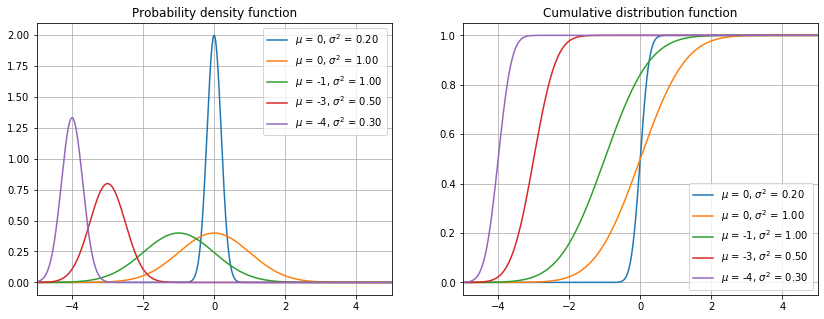

In [3]:
from scipy.stats import norm

# Gaussian parameters
mu = [0, 0, -1, -3, -4]
sg = [0.2, 1, 1, 0.5, 0.3]

# Create Normal distributions
pxn = [norm(mu[i], sg[i]) for i in range(5)]

tt = np.linspace(-5, 5, N)
# Plot PDF and CDF
fig = plt.figure(1, figsize=(14, 5))

plt.subplot(1,2,1)
plt.title('Probability density function')
for i in range(5):
    plt.plot(tt, pxn[i].pdf(tt), color='C'+str(i), markersize=2, label='$\mu$ = %d, $\sigma^2$ = %0.2f' % (mu[i], sg[i]))
plt.legend(loc='upper right')
plt.xlim([-5, 5])
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Cumulative distribution function')
for i in range(5):
    plt.plot(tt, pxn[i].cdf(tt), color='C'+str(i), markersize=2, label='$\mu$ = %d, $\sigma^2$ = %0.2f' % (mu[i], sg[i]))
plt.legend(loc='lower right')
plt.xlim([-5, 5])
plt.grid(True)

### Длина случайного процесса

На основании центральной предельной теоремы, чем больше длительность случайного процесса, тем сильнее он похож на нормальное (Гауссовское) распределение. Можно показать, что при увеличении длины сигнала, функция плотности вероятности стремится к функции нормального распределения.

Зададим длину случайной последовательности $N = 100, 1000, 10000, 100000$ отсчётов. На приведенных ниже графиках показано, как длина случайного процесса влияет на форму графика плотности вероятности.

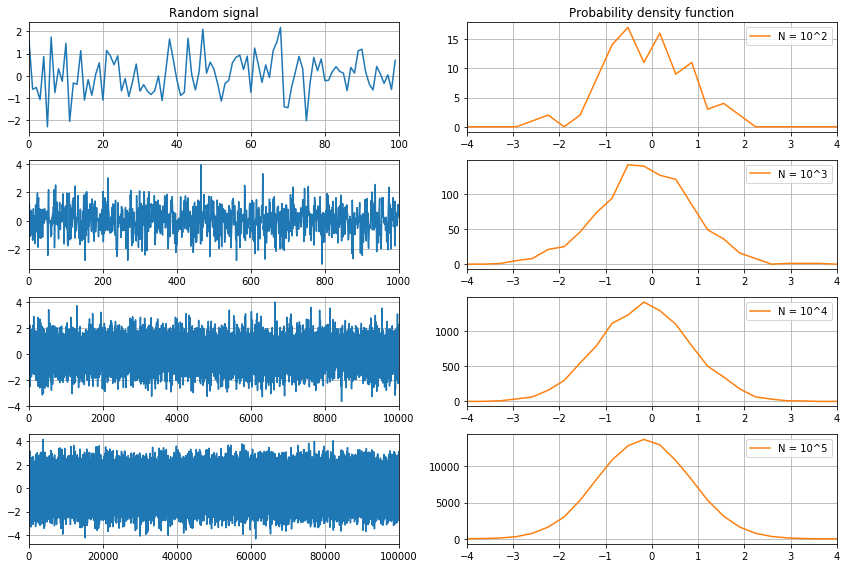

In [4]:
N = 10 ** np.arange(2,6)

# Set random seed
np.random.seed(1)

plt.figure(figsize=(12, 8))
for i in range(len(N)):

    # create random signal
    dat = np.random.normal(size=N[i])
    # hist and bins
    hist, bins = np.histogram(dat, np.linspace(-5, 5, 30))
    # probability density function
    pdf = norm.pdf(bins)
    
    plt.subplot(len(N), 2, 2*i+1)
    if i == 0:
        plt.title('Random signal')
    plt.plot(dat)
    plt.xlim([0, dat.size])
    plt.grid(True)
    
    plt.subplot(len(N), 2, 2*i+2)
    if i == 0:
        plt.title('Probability density function')
    plt.plot(bins[:-1], hist, color='C1', label='N = 10^{}'.format(int(np.log10(N[i]))))
    plt.xlim([-4, 4])
    plt.legend(loc='upper right')
    plt.grid(True)
plt.tight_layout()

### Python библиотека Random

Python библиотека numpy содержит пакет **random**, который содержит набор функций математической статистики. Для импорта пакета в проект необходимо выполнить команду:

```python
from numpy.random import *
# or
import numpy as np
```

Кроме того, в библиотеке scipy содержится пакет **stats*, который дополняет (и частично переопределяет) функционал пакета random. Приведем список основных функций из пакета random:

| **Function**      | **Description** |
| --- | --- | 
| `rand(d0, d1, ..., dn)`               | Равномерное распределение (возвращает N-мерный массив) |
| `randn(d0, d1, ..., dn)`              | Стандартное нормальное распределение (возвращает N-мерный массив) |
| `randint(low[, high, size, dtype])`   | Массив целочисленных значений в заданном диапазоне |
| `random([size])`                      | Равномерное распределение в интервале $[0.0, 1.0)$ |
| `shuffle(x)`                          | Перестановка элементов последовательности "на лету" |
| `permutation(x)`                      | Перестановка элементов массива или возврат их индексов |
| `normal([loc, scale, size])`          | Массив случайных чисел, распределенных по нормальному закону |
| `pareto(a[, size])`                   | Массив случайных чисел, распределенных по закону Парето |
| `poisson([lam, size])`                | Массив случайных чисел, распределенных по закону Пуассона  |
| `rayleigh([scale, size])`             | Массив случайных чисел, распределенных по Рэлеевскому закону |
| `seed([seed])`                        | Инициализация псевдослучайной величины |

____

В задачах цифровой обработки сигналов случайные процессы играют важную роль. С помощью случайных величин можно моделировать воздействие реальной среды на прохождение сигнала от источника к приёмнику данных. Зачастую, при прохождении сигнала через какое-то шумящее звено, к сигналу добавляется так называемый **белый шум**. Как правило, спектральная плотность такого шума равномерно (одинаково) распределена на всех частотах, а значения шума во временной области распределены нормально (Гауссовский закон распределения). Поскольку белый шум физически добавляется к амплитудам сигнала в выбранные отсчеты времени, он называется **аддитивный**. Таким образом, основной источник шумов носит название *аддитивный белый гауссовский шум* (AWGN - Additive white Gaussian noise). 

Стоит отметить, что термин *белый* связан с тем, что спектральные составляющие равномерно распределены по всему диапазону частот. Изучение особенностей шумов выходит за рамки этого материала, но в последующих лекциях планируется вернуться к вопросам влияния шумов на протекающие процессы в устройствах, в частности в цифровых. Поскольку частотные значения распределены равномерно, автокорреляционная функция (АКФ) белого шума в идеале стремится к **дельта-функции**. 

Приведем график белого шума во временной области, а также построим его АКФ. В качестве генератора белого шума воспользуемся функцией `randn()` из пакета *random*

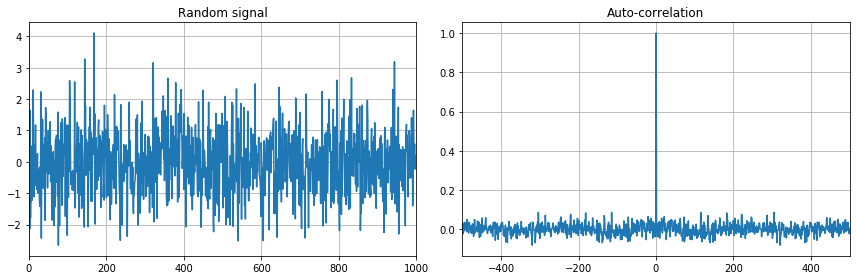

In [5]:
# Auto-correlation function
def auto_corr(x):
    res = np.correlate(x, x, mode='same')
    return res / np.max(res)

N = 1000
# Random signal
np.random.seed(2)
dat = np.random.randn(N)

# ACF: Auto-correlation
cfx = auto_corr(dat)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title('Random signal')
plt.plot(dat)
plt.xlim([0, dat.size])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Auto-correlation')
plt.plot(np.linspace(-N//2, N//2, N), cfx)
plt.xlim([-N//2, N//2])
plt.grid(True)
plt.tight_layout()

## Детерминированные сигналы

В мире существует множество сигналов различной формы, однако в задачах цифровой и аналоговой обработки часто используются известные сигналы - гармонической формы, модулированные (по амплитуде, частоте или фазе). Как известно, сигнал любой формы можно представить как совокупность гармонических сигналов разных частот и амплитуд (то есть набор спектральных отсчетов). Можно сказать, что чем сложнее сигнал - тем больше спектральных отсчетов требуется для его представления. В частности, для представления сигналов с резкими изменениями формы требуются высокие частоты спектра, а для "гладких" сигналов и медленно меняющихся процессов высокие частоты не требуются и не вносят вклад в результирующий сигнал (и его спектр).

### Гармонический сигнал

Гармонический сигнал задается уравнением:  

$s(t) = A \cdot cos(2\pi ft +\phi)$, 

где *A* – амплитуда колебания, f - частота сигнала, φ – начальная фаза. 

Комплексная запись такого сигнала:

$s = A \cdot e^{j(2\pi ft +\phi)}$, 

где *j* - комплексная единица. Часто выражается как $j = \sqrt-1$

Ниже представлен график гармонического сигнала при различных параметрах значения частоты. Амплитуда = 1, начальная фаза = 0 (константы).

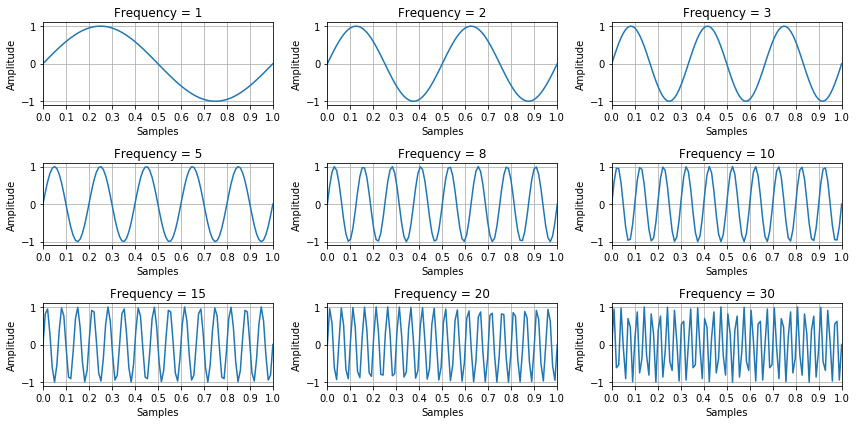

In [6]:
n = 100
t = np.linspace(0, 1, n, endpoint=True)

# list of frequencies
f_list = np.array([1, 2, 3, 5, 8, 10, 15, 20, 30])

plt.figure(figsize=(12, 6))
for i, freq in enumerate(f_list):
    plt.subplot(3, 3, i+1)
    plt.plot(t, np.sin(2*np.pi*freq*t))
    plt.title(f'Frequency = {freq}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.xlim([0, 1])
    plt.xticks(np.linspace(0, 1, 11, endpoint=True))
    plt.grid()
plt.tight_layout()

### Амплитудная модуляция

Амплитудная модуляция - широко известный способ изменения формы сигнала по параметру амплитуды. Из названия очевидно, что амплитуда такого сигнала изменяется во времени. Закон изменения амплитуды - произвольный, на практике часто используется модуляция гармоническим колебанием.

Формула простейшего гармонического АМ-сигнала:  

$s(t) = A_c \cdot (1 + m \cdot cos(\omega_mt +\phi)) \cdot cos(\omega_сt)$, 

где 
- $A_{c}$ – амплитуда несущего колебания, 
- $\omega_{c}$ – частота несущего сигнала, 
- $\omega_{m}$ – частота модулирующего (информационного) сигнала, 
- $\phi$ – начальная фаза модулирующего сигнала,
- *m* - коэффициент модуляции.

Тогда, радиосигнал состоит из несущего колебания и двух боковых полос. Из названия, очевидно, что несущая частота - та, на которой распространяется сигнал. Как правило, это высокая частота относительно модулирующей частоты.

Модулирующая частота, в свою очередь, низкочастотная. Это такая частота, на которой передается информационное сообщение.

Для синусоидального сигнала, использованного в качестве примера боковые полосы представляют собой синусоидальные сигналы и их частоты равны $\omega_{c}+\omega_{m}$ и $\omega_{c}-\omega_{m}$. Спектр АМ-сигнала всегда симметричен относительно центральной (несущей) частоты.

Важно понимать, что центральная частота не несет полезной информации, хоть и называется "несущая". В это понятие вкладывается значение частоты, относительно которого располагаются информационные (модулирующие) частоты сигнала. 

Создадим функцию АМ-сигнала:

In [7]:
def signal_am(amp=1.0, km=0.25, fc=10.0, fs=2.0, period=100):
    """
    Create Amplitude modulation (AM) signal

    Parameters
    ----------
    amp : float
        Signal magnitude
    km : float
        Modulation coeff: amplitude sensitivity 0 <= km < 1
    fc : float
        Carrier frequency
    fs : float
        Signal frequency
    period : integer
        Number of points for signal (same as period)
    """
    tt = 2.0 * np.pi * np.linspace(0, 1, period)
    return amp * (1 + km * np.cos(fs * tt)) * np.cos(fc * tt)

На приведенных ниже графиках показано, как меняется форма и спектр АМ-сигнала при изменении параметра **несущей частоты** $f_c$:

Как видно, спектр АМ-сигнала состоит из трех компонент: центральная - несущая, и две боковые - модулирующие. При изменении несущей частоты происходит смещение всего АМ-сигнала по частоте.

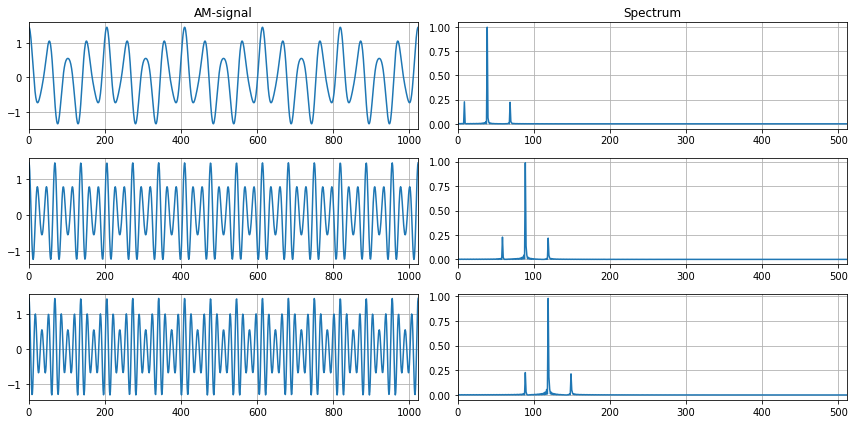

In [8]:
N = 1024

# Create AM-signal
fs = 15             # Modulation frequency
fc = [20, 45, 60]   # Carrier frequency

sig = [signal_am(amp=1.0, km=0.45, fc=i, fs=fs, period=N) for i in fc]

# Calculate FFT
sft = np.abs(rfft(sig, axis=1)) / N / 0.5

plt.figure(figsize=(12, 6))
for i, freq in enumerate(fc):
    plt.subplot(len(fc), 2, 2*i+1)
    if i == 0:
        plt.title('AM-signal')
    plt.plot(sig[i])
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(len(fc), 2, 2*i+2)
    if i == 0:
        plt.title('Spectrum')
    plt.plot(sft[i])
    plt.xlim([0, N-1])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

На приведенных ниже графиках показано, как меняется форма и спектр АМ-сигнала при изменении параметра **частоты модулирующего колебания** $f_s$:

Как видно, при изменении модулирующей частоты, спектр не сдвигается, но изменяется расстрояние между центральной (несущей) частотой и боковыми (модулирующими) частотами. 

Ширина спектра АМ сигнала равна удвоенной частоте модулирующего сигнала.

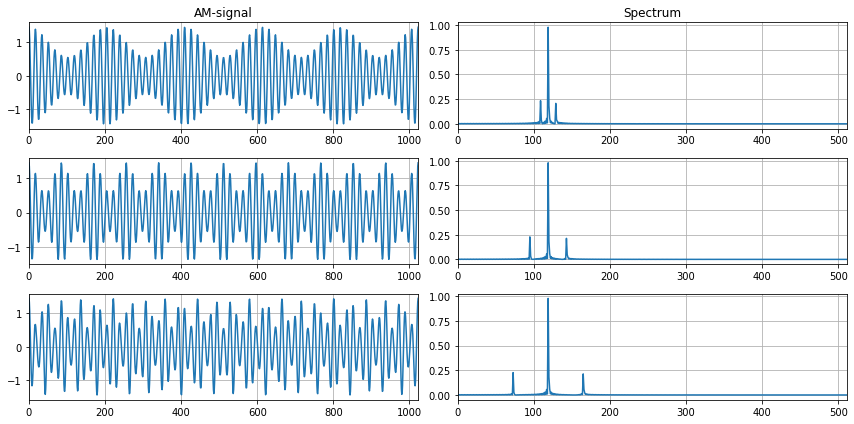

In [9]:
N = 1024
# Create AM-signal
fs = [5, 12, 23]    # Modulation frequency
fс = 60             # Carrier frequency

sig = [signal_am(amp=1.0, km=0.45, fc=fс, fs=i, period=N) for i in fs]

# Calculate FFT
sft = np.abs(rfft(sig, axis=1)) / N / 0.5

plt.figure(figsize=(12, 6))
for i, freq in enumerate(fs):
    plt.subplot(len(fc), 2, 2*i+1)
    if i == 0:
        plt.title('AM-signal')
    plt.plot(sig[i])
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(len(fs), 2, 2*i+2)
    if i == 0:
        plt.title('Spectrum')
    plt.plot(sft[i])
    plt.xlim([0, N-1])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

Наконец, посмотрим, как меняется форма и спектр АМ-сигнала при изменении параметра **коэффициента модуляции** $k_m$:

Как видно, при изменении коэффициента модуляции, спектр сигнала остается на месте. Меняется только уровень боковых составляющих. Заметим, что при $k_m > 1$ возникает так называемая избыточная модуляция (перемодуляция). Максимальное значение коэффициента модуляции, при котором не возникает перемодуляции АМ-сигнала $k_m = 1$. 

Амплитуда центральной гармоники равна амплитуде несущего колебания: $A_c = A_o$. 

Амплитуда боковых составляющих равна $A_m = \frac{A_o\cdot m}{2}$



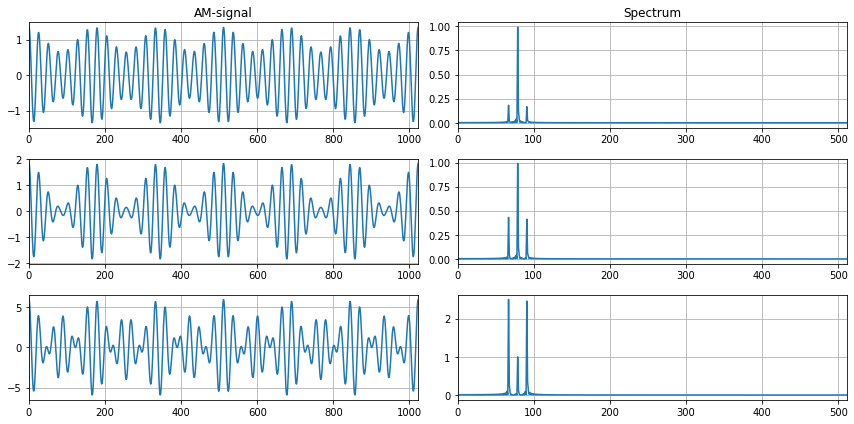

In [10]:
N = 1024
# Create AM-signal
fs = 6                  # Modulation frequency
fс = 40                 # Carrier frequency
km = [0.35, 0.85, 5]    # modulation coeff.

sig = [signal_am(amp=1.0, km=i, fc=fс, fs=fs, period=N) for i in km]

# Calculate FFT
sft = np.abs(rfft(sig, axis=1)) / N / 0.5

plt.figure(figsize=(12, 6))
for i, freq in enumerate(km):
    plt.subplot(len(km), 2, 2*i+1)
    if i == 0:
        plt.title('AM-signal')
    plt.plot(sig[i])
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(len(km), 2, 2*i+2)
    if i == 0:
        plt.title('Spectrum')
    plt.plot(sft[i])
    plt.xlim([0, N-1])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

Среди класса сигналов с амплитудной модуляцией есть ряд сигналов, которые лучше используют энергетические характеристики сигнала. Например, сигналы с подавленой несущей относятся к классу АМ-сигналов, и позволяют производить передачу сообщений более экономно в плане энергетических спектральных характеристиик.
____

### Угловая модуляция

Под термином угловая модуляция понимается модуляция по фазе или по частоте (математически можно представить, что изменяется "угол" тригонометрической функции). Таким образом, сигналы с угловой модуляцией делятся на **частотно-модулированные** (ЧМ) сигналы и **фазо-модулированные** (ФМ) сигналы.

# TODO: 

**FM SIGNALS**